## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Business Understanding

- Predictive sale pricing for relators working with sellers (price the home to sell)

### Problem/Stakeholder
We are a data science consulting company working with a real estate company to help assist with creating a pricing model for incoming listings. 

### Data Understanding

## Data Preparation

In [213]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

Pulling in data and exploring data prior to cleaning.

In [3]:
data = pd.read_csv('./data/kc_house_data.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We see we have null values in "waterfront", "view", and "yr_renovated" columns. 

In [7]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [8]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


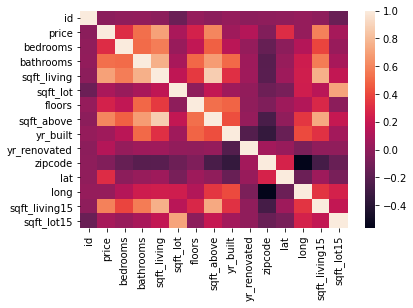

In [9]:
sns.heatmap(data.corr());

In [10]:
#Yr_renovated and price correlation .1296; might flatten past a certain year.  

In [11]:
data.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

We see we have both nulls and "0" values in this column.

In [12]:
data.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [13]:
17755 - 17011

744

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [15]:
data.drop(columns='yr_renovated', inplace=True)

'yr_renovated' only contains 744 values, which is less than 1% of the data. Dropping the column 'yr_renovated' due to the low value counts.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [17]:
data.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [18]:
data.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Only 60 null values, could drop those rows utilizing dropna or replace with our Mode value, "None."

In [19]:
data['view'].fillna("NONE", inplace=True)

In [20]:
data['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [22]:
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

No is overwhelming mode; could replace nulls with mode or create 3rd column "Unknown". 

In [23]:
data['waterfront'].fillna("UNKNOWN", inplace=True)

In [24]:
data['waterfront'].value_counts()

NO         19075
UNKNOWN     2376
YES          146
Name: waterfront, dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [26]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
792.0         1
475.0         1
1816.0        1
417.0         1
2180.0        1
Name: sqft_basement, Length: 304, dtype: int64

Here we see we have some values of "?"; we need to decide how to clean this data. We will replace "?" with 0 because a large proportion of our data is at 0.

In [27]:
data['sqft_basement'].replace(to_replace = '?', value = 0.0, inplace=True)

In [28]:
data['sqft_basement'].value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
935.0         1
2610.0        1
1248.0        1
374.0         1
2180.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [29]:
data['sqft_basement'] = data['sqft_basement'].astype(str).astype(float)

In [30]:
data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

Since there is only 1 data point with a grade of (3 Poor), we will drop it as in contains <1% of the data.

In [31]:
data = data[data.grade != '3 Poor']

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     21596 non-null  object 
 9   view           21596 non-null  object 
 10  condition      21596 non-null  object 
 11  grade          21596 non-null  object 
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  float64
 14  yr_built       21596 non-null  int64  
 15  zipcode        21596 non-null  int64  
 16  lat            21596 non-null  float64
 17  long           21596 non-null  float64
 18  sqft_l

In [33]:
data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
Name: grade, dtype: int64

In [34]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016799,0.001061,0.005100,-0.012301,-0.131914,0.018577,-0.010853,-0.004382,0.021559,-0.008247,-0.001887,0.020727,-0.002733,-0.138560
price,-0.016799,1.000000,0.308749,0.525889,0.701914,0.089876,0.256780,0.605355,0.321092,0.053897,-0.053441,0.306653,0.022092,0.585228,0.082845
bedrooms,0.001061,0.308749,1.000000,0.514413,0.578137,0.032470,0.177866,0.479303,0.297200,0.155498,-0.154244,-0.010256,0.132266,0.393362,0.030692
bathrooms,0.005100,0.525889,0.514413,1.000000,0.755724,0.088375,0.502553,0.686629,0.278454,0.507103,-0.204893,0.024076,0.225060,0.569860,0.088307
sqft_living,-0.012301,0.701914,0.578137,0.755724,1.000000,0.173460,0.353912,0.876433,0.428642,0.318059,-0.199902,0.051967,0.241366,0.756393,0.184353
sqft_lot,-0.131914,0.089876,0.032470,0.088375,0.173460,1.000000,-0.004817,0.184146,0.015030,0.052946,-0.129591,-0.085533,0.230243,0.144763,0.718204
floors,0.018577,0.256780,0.177866,0.502553,0.353912,-0.004817,1.000000,0.523962,-0.241901,0.489163,-0.059588,0.049139,0.126019,0.280073,-0.010723
sqft_above,-0.010853,0.605355,0.479303,0.686629,0.876433,0.184146,0.523962,1.000000,-0.051224,0.423966,-0.261665,-0.001380,0.344990,0.731755,0.195086
sqft_basement,-0.004382,0.321092,0.297200,0.278454,0.428642,0.015030,-0.241901,-0.051224,1.000000,-0.130148,0.073242,0.109794,-0.142332,0.199265,0.015885
yr_built,0.021559,0.053897,0.155498,0.507103,0.318059,0.052946,0.489163,0.423966,-0.130148,1.000000,-0.347327,-0.148607,0.410169,0.326331,0.070781


Dropping ID and Date columns as they are not relevant to our analysis.

In [35]:
data.drop(columns=('id'), inplace=True)

In [36]:
data.drop(columns=('date'), inplace=True)

Adding price per sqft columnn to help with comparison.

In [37]:
data['price_per_sqft_living'] = (data['price']/data['sqft_living'])

In [38]:
data['price_per_sqft_living'].sort_values()

18248     87.588235
3781      87.647059
13812     87.713311
17183     88.000000
1383      88.028169
            ...    
9305     792.105263
8614     792.682927
10435    798.122066
4009     800.000000
19321    810.138889
Name: price_per_sqft_living, Length: 21596, dtype: float64

In [39]:
data['price_per_sqft_living'].describe()

count    21596.000000
mean       264.132269
std        109.990513
min         87.588235
25%        182.291667
50%        244.626805
75%        318.328353
max        810.138889
Name: price_per_sqft_living, dtype: float64

In [40]:
IQR = 318.33 - 182.29

In [41]:
IQR * 1.5

204.06

In [42]:
318.33 + 204.06

522.39

In [43]:
(data['price_per_sqft_living'] > 522).value_counts()

False    20889
True       707
Name: price_per_sqft_living, dtype: int64

In [44]:
data['price'].describe()

count    2.159600e+04
mean     5.403095e+05
std      3.673718e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [45]:
q3, q1 = np.percentile(data['price'], [75 ,25])
iqr = q3 - q1

In [46]:
iqr2 = iqr*1.5

In [47]:
q3 + iqr2

1129500.0

In [48]:
q1 - iqr2

-162500.0

In [49]:
(data['price'] > 1129500).value_counts()

False    20438
True      1158
Name: price, dtype: int64

In [50]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living
0,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,188.050847
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,209.338521
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,233.766234
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,308.163265
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,303.571429


We want to further look into how distance from the epicenter of Seattle effects sale price. We will create a column calculating difference between home and Seattle epicenter. We will be utilizing the Seattle Art Museum coordinates for Seattle: (lat = 47.6077, long= -122.337).

In [51]:
from geopy.distance import geodesic
import geopy

In [52]:
print(geodesic((47.5112, -122.257), (47.6077, -122.337)).miles)

7.644653496774576


In [53]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living
0,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,188.050847
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,209.338521
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,233.766234
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,308.163265
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,303.571429


In [54]:
coords = (47.6077, -122.337)

In [55]:
data['distance_from_Seattle'] = data.apply(lambda x: geopy.distance.distance((x.lat, x. long), coords).miles, axis=1)

In [56]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle
0,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,188.050847,7.644653
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,209.338521,7.872439
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,233.766234,10.220653
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,308.163265,6.549707
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,303.571429,13.655673


We have cleaned all of our null values. 

## WILL NEED TO BE DROPPED IN STUDENT NOTEBOOK

We will drop zipcode since it is categorical data. We have already captured location-based data with distance_from_Seattle.

In [57]:
data.drop(columns='zipcode', inplace=True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21596 non-null  float64
 1   bedrooms               21596 non-null  int64  
 2   bathrooms              21596 non-null  float64
 3   sqft_living            21596 non-null  int64  
 4   sqft_lot               21596 non-null  int64  
 5   floors                 21596 non-null  float64
 6   waterfront             21596 non-null  object 
 7   view                   21596 non-null  object 
 8   condition              21596 non-null  object 
 9   grade                  21596 non-null  object 
 10  sqft_above             21596 non-null  int64  
 11  sqft_basement          21596 non-null  float64
 12  yr_built               21596 non-null  int64  
 13  lat                    21596 non-null  float64
 14  long                   21596 non-null  float64
 15  sq

Here, we create visualizations to see if the data is relatively normal and if we want to utilize the data. If we decide to utilize these variables and hot code, we need to drop a column to prevent multicollinearity. Column dropped becomes baseline. We will encode once we train the data. View article link: https://github.com/hoffm386/coefficients-of-dropped-categorical-variables

In [59]:
data['condition'] = pd.Categorical(data['condition'], ['Poor','Fair','Average','Good', 'Very Good'])

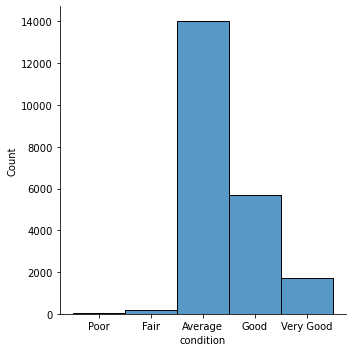

In [60]:
sns.displot(data=data, x='condition');

In [61]:
data['grade'] = pd.Categorical(data['grade'], ['3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])

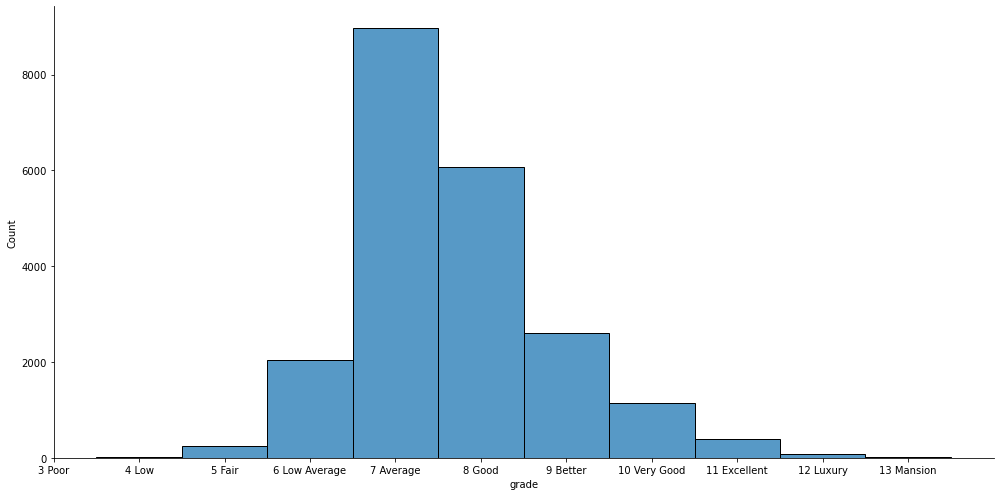

In [62]:
sns.displot(data=data, x='grade', height=7, aspect=2);

In [63]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle
price,1.000000,0.308749,0.525889,0.701914,0.089876,0.256780,0.605355,0.321092,0.053897,0.306653,0.022092,0.585228,0.082845,0.556201,-0.283653
bedrooms,0.308749,1.000000,0.514413,0.578137,0.032470,0.177866,0.479303,0.297200,0.155498,-0.010256,0.132266,0.393362,0.030692,-0.205700,0.060773
bathrooms,0.525889,0.514413,1.000000,0.755724,0.088375,0.502553,0.686629,0.278454,0.507103,0.024076,0.225060,0.569860,0.088307,-0.090123,0.086247
sqft_living,0.701914,0.578137,0.755724,1.000000,0.173460,0.353912,0.876433,0.428642,0.318059,0.051967,0.241366,0.756393,0.184353,-0.091011,0.078417
sqft_lot,0.089876,0.032470,0.088375,0.173460,1.000000,-0.004817,0.184146,0.015030,0.052946,-0.085533,0.230243,0.144763,0.718204,-0.034748,0.243477
floors,0.256780,0.177866,0.502553,0.353912,-0.004817,1.000000,0.523962,-0.241901,0.489163,0.049139,0.126019,0.280073,-0.010723,0.004744,0.004315
sqft_above,0.605355,0.479303,0.686629,0.876433,0.184146,0.523962,1.000000,-0.051224,0.423966,-0.001380,0.344990,0.731755,0.195086,-0.087415,0.194830
sqft_basement,0.321092,0.297200,0.278454,0.428642,0.015030,-0.241901,-0.051224,1.000000,-0.130148,0.109794,-0.142332,0.199265,0.015885,-0.023515,-0.199030
yr_built,0.053897,0.155498,0.507103,0.318059,0.052946,0.489163,0.423966,-0.130148,1.000000,-0.148607,0.410169,0.326331,0.070781,-0.289918,0.391813
lat,0.306653,-0.010256,0.024076,0.051967,-0.085533,0.049139,-0.001380,0.109794,-0.148607,1.000000,-0.135216,0.048576,-0.086154,0.472895,-0.598555


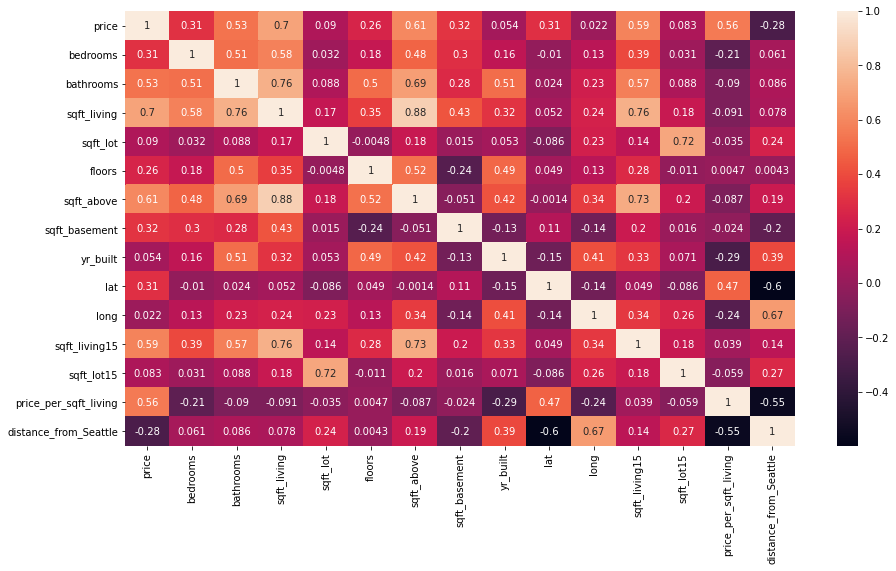

In [64]:
cor = data.corr()

plt.figure(figsize = (15, 8))
sns.heatmap(cor, annot=True);

We see that there is a large difference in the correlations between codition and price and grade and price, even though the columns seem to describe similar attributes. 

- 'sqft_living' highly correlated to 'bathrooms', 'grade', 'sqft_above', and 'sqft_living15'
- 'sqft_lot' is highly correlated to 'sqft_lot15'

Train test split. 

In [65]:
X, y = data.drop(columns='price'), data[['price']]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [67]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17276, 18) (4320, 18) (17276, 1) (4320, 1)


In [68]:
training_data, testing_data = train_test_split(data, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 17276
No. of testing examples: 4320


In [69]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   price                  17276 non-null  float64 
 1   bedrooms               17276 non-null  int64   
 2   bathrooms              17276 non-null  float64 
 3   sqft_living            17276 non-null  int64   
 4   sqft_lot               17276 non-null  int64   
 5   floors                 17276 non-null  float64 
 6   waterfront             17276 non-null  object  
 7   view                   17276 non-null  object  
 8   condition              17276 non-null  category
 9   grade                  17276 non-null  category
 10  sqft_above             17276 non-null  int64   
 11  sqft_basement          17276 non-null  float64 
 12  yr_built               17276 non-null  int64   
 13  lat                    17276 non-null  float64 
 14  long                   17276 non-nu

In [70]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 3991 to 13008
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   price                  4320 non-null   float64 
 1   bedrooms               4320 non-null   int64   
 2   bathrooms              4320 non-null   float64 
 3   sqft_living            4320 non-null   int64   
 4   sqft_lot               4320 non-null   int64   
 5   floors                 4320 non-null   float64 
 6   waterfront             4320 non-null   object  
 7   view                   4320 non-null   object  
 8   condition              4320 non-null   category
 9   grade                  4320 non-null   category
 10  sqft_above             4320 non-null   int64   
 11  sqft_basement          4320 non-null   float64 
 12  yr_built               4320 non-null   int64   
 13  lat                    4320 non-null   float64 
 14  long                   4320 non-null

In [71]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle
17843,3,2.25,1980,8000,1.0,NO,NONE,Good,9 Better,1560,420.0,1974,47.3149,-122.378,2360,8000,148.989899,20.318780
16911,3,1.00,890,9870,1.0,UNKNOWN,NONE,Good,7 Average,890,0.0,1960,47.5398,-122.178,1270,9861,402.247191,8.789729
20876,4,3.00,5370,69848,2.0,UNKNOWN,NONE,Average,10 Very Good,3500,1870.0,2005,47.3166,-122.046,4443,94403,147.113594,24.295918
14355,3,1.75,1600,8400,1.0,NO,NONE,Very Good,8 Good,1600,0.0,1963,47.5479,-122.179,2210,8400,300.000000,8.462936
15790,3,2.25,2860,10625,1.0,NO,EXCELLENT,Average,10 Very Good,1920,940.0,1976,47.6915,-122.273,2860,8075,416.083916,6.514901


In [72]:
training_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle
17843,295000.0,3,2.25,1980,8000,1.0,NO,NONE,Good,9 Better,1560,420.0,1974,47.3149,-122.378,2360,8000,148.989899,20.318780
16911,358000.0,3,1.00,890,9870,1.0,UNKNOWN,NONE,Good,7 Average,890,0.0,1960,47.5398,-122.178,1270,9861,402.247191,8.789729
20876,790000.0,4,3.00,5370,69848,2.0,UNKNOWN,NONE,Average,10 Very Good,3500,1870.0,2005,47.3166,-122.046,4443,94403,147.113594,24.295918
14355,480000.0,3,1.75,1600,8400,1.0,NO,NONE,Very Good,8 Good,1600,0.0,1963,47.5479,-122.179,2210,8400,300.000000,8.462936
15790,1190000.0,3,2.25,2860,10625,1.0,NO,EXCELLENT,Average,10 Very Good,1920,940.0,1976,47.6915,-122.273,2860,8075,416.083916,6.514901


In [73]:
y_train.head()

,price
17843,295000.0
16911,358000.0
20876,790000.0
14355,480000.0
15790,1190000.0


Above is a sanity check that our training_data lines up with our X_train and our y_train.

We need to deal with our categorical variables, which we will convert utilizing One Hot Encoding. When modeling, we will have to remove one encoder from each category. 

In [74]:
categoricals = ['view', 'waterfront', 'condition', 'grade']
X_train_dummies = pd.get_dummies(X_train[categoricals], prefix=categoricals)
X_train_dummies

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_NO,waterfront_UNKNOWN,waterfront_YES,condition_Poor,condition_Fair,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
17843,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16911,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
20876,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14355,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15790,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21246,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1175,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2934,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
categoricals = ['view', 'waterfront', 'condition', 'grade']
X_test_dummies = pd.get_dummies(X_test[categoricals], prefix=categoricals)
X_test_dummies

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_NO,waterfront_UNKNOWN,waterfront_YES,condition_Poor,condition_Fair,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
3991,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16939,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9467,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20168,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10554,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
5671,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10944,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18174,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   bedrooms               17276 non-null  int64   
 1   bathrooms              17276 non-null  float64 
 2   sqft_living            17276 non-null  int64   
 3   sqft_lot               17276 non-null  int64   
 4   floors                 17276 non-null  float64 
 5   waterfront             17276 non-null  object  
 6   view                   17276 non-null  object  
 7   condition              17276 non-null  category
 8   grade                  17276 non-null  category
 9   sqft_above             17276 non-null  int64   
 10  sqft_basement          17276 non-null  float64 
 11  yr_built               17276 non-null  int64   
 12  lat                    17276 non-null  float64 
 13  long                   17276 non-null  float64 
 14  sqft_living15          17276 non-nu

Dropping the categorical columns so we can add the dummied columns.

In [77]:
X_train.drop(['view', 'condition', 'grade', 'waterfront'], axis=1, inplace=True)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               17276 non-null  int64  
 1   bathrooms              17276 non-null  float64
 2   sqft_living            17276 non-null  int64  
 3   sqft_lot               17276 non-null  int64  
 4   floors                 17276 non-null  float64
 5   sqft_above             17276 non-null  int64  
 6   sqft_basement          17276 non-null  float64
 7   yr_built               17276 non-null  int64  
 8   lat                    17276 non-null  float64
 9   long                   17276 non-null  float64
 10  sqft_living15          17276 non-null  int64  
 11  sqft_lot15             17276 non-null  int64  
 12  price_per_sqft_living  17276 non-null  float64
 13  distance_from_Seattle  17276 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 2.0 MB


In [79]:
X_test.drop(['view', 'condition', 'grade', 'waterfront'], axis=1, inplace=True)

In [80]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 3991 to 13008
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               4320 non-null   int64  
 1   bathrooms              4320 non-null   float64
 2   sqft_living            4320 non-null   int64  
 3   sqft_lot               4320 non-null   int64  
 4   floors                 4320 non-null   float64
 5   sqft_above             4320 non-null   int64  
 6   sqft_basement          4320 non-null   float64
 7   yr_built               4320 non-null   int64  
 8   lat                    4320 non-null   float64
 9   long                   4320 non-null   float64
 10  sqft_living15          4320 non-null   int64  
 11  sqft_lot15             4320 non-null   int64  
 12  price_per_sqft_living  4320 non-null   float64
 13  distance_from_Seattle  4320 non-null   float64
dtypes: float64(7), int64(7)
memory usage: 506.2 KB


In [81]:
X_test = X_test.join(X_test_dummies)

In [82]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 3991 to 13008
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               4320 non-null   int64  
 1   bathrooms              4320 non-null   float64
 2   sqft_living            4320 non-null   int64  
 3   sqft_lot               4320 non-null   int64  
 4   floors                 4320 non-null   float64
 5   sqft_above             4320 non-null   int64  
 6   sqft_basement          4320 non-null   float64
 7   yr_built               4320 non-null   int64  
 8   lat                    4320 non-null   float64
 9   long                   4320 non-null   float64
 10  sqft_living15          4320 non-null   int64  
 11  sqft_lot15             4320 non-null   int64  
 12  price_per_sqft_living  4320 non-null   float64
 13  distance_from_Seattle  4320 non-null   float64
 14  view_AVERAGE           4320 non-null   uint8  
 15  

In [83]:
X_train = X_train.join(X_train_dummies)

In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               17276 non-null  int64  
 1   bathrooms              17276 non-null  float64
 2   sqft_living            17276 non-null  int64  
 3   sqft_lot               17276 non-null  int64  
 4   floors                 17276 non-null  float64
 5   sqft_above             17276 non-null  int64  
 6   sqft_basement          17276 non-null  float64
 7   yr_built               17276 non-null  int64  
 8   lat                    17276 non-null  float64
 9   long                   17276 non-null  float64
 10  sqft_living15          17276 non-null  int64  
 11  sqft_lot15             17276 non-null  int64  
 12  price_per_sqft_living  17276 non-null  float64
 13  distance_from_Seattle  17276 non-null  float64
 14  view_AVERAGE           17276 non-null  uint8  
 15 

In [85]:
training_data = X_train.join(y_train)

In [86]:
training_data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,price
bedrooms,1.000000,0.527799,0.596137,0.034978,0.183881,0.493947,0.307867,0.160679,-0.011939,0.135270,...,-0.119792,-0.247899,-0.107550,0.077041,0.166574,0.138391,0.122874,0.062507,0.037896,0.319467
bathrooms,0.527799,1.000000,0.758252,0.089691,0.502104,0.690250,0.277937,0.508499,0.021454,0.227917,...,-0.137695,-0.367772,-0.312582,0.188691,0.266049,0.270647,0.249096,0.170774,0.102700,0.529186
sqft_living,0.596137,0.758252,1.000000,0.173248,0.349527,0.876143,0.431235,0.315131,0.049361,0.241962,...,-0.127652,-0.312441,-0.353836,0.069594,0.315228,0.365674,0.345622,0.250528,0.148885,0.705037
sqft_lot,0.034978,0.089691,0.173248,1.000000,-0.003145,0.179762,0.022921,0.049037,-0.081565,0.231106,...,0.022935,-0.017295,-0.066041,-0.022991,0.043717,0.074570,0.074839,0.067363,0.007684,0.089471
floors,0.183881,0.502104,0.349527,-0.003145,1.000000,0.521912,-0.245726,0.487306,0.048492,0.123130,...,-0.080243,-0.229985,-0.310021,0.203985,0.242653,0.176036,0.117874,0.057877,0.022414,0.256185
sqft_above,0.493947,0.690250,0.876143,0.179762,0.521912,1.000000,-0.049013,0.420195,-0.003698,0.343889,...,-0.109088,-0.280466,-0.385172,0.059401,0.341157,0.375497,0.342040,0.233194,0.125581,0.608112
sqft_basement,0.307867,0.277937,0.431235,0.022921,-0.245726,-0.049013,1.000000,-0.127536,0.109042,-0.137190,...,-0.060002,-0.121658,-0.014760,0.032814,0.016324,0.056153,0.075930,0.085615,0.075084,0.323081
yr_built,0.160679,0.508499,0.315131,0.049037,0.487306,0.420195,-0.127536,1.000000,-0.148858,0.407683,...,-0.132021,-0.313780,-0.210443,0.199800,0.220700,0.149212,0.099049,0.049004,0.005670,0.057282
lat,-0.011939,0.021454,0.049361,-0.081565,0.048492,-0.003698,0.109042,-0.148858,1.000000,-0.131460,...,-0.046692,-0.061335,-0.037577,0.022542,0.041842,0.053392,0.039287,0.015628,0.012443,0.302195
long,0.135270,0.227917,0.241962,0.231106,0.123130,0.343889,-0.137190,0.407683,-0.131460,1.000000,...,0.008701,-0.112436,-0.112999,0.029854,0.124418,0.104530,0.060860,0.034601,-0.006692,0.025198


### Scaling Data

In [89]:
ss=StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

In [90]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
17843,3,2.25,1980,8000,1.0,1560,420.0,1974,47.3149,-122.378,...,0,0,0,0,0,1,0,0,0,0
16911,3,1.00,890,9870,1.0,890,0.0,1960,47.5398,-122.178,...,0,0,0,1,0,0,0,0,0,0
20876,4,3.00,5370,69848,2.0,3500,1870.0,2005,47.3166,-122.046,...,0,0,0,0,0,0,1,0,0,0
14355,3,1.75,1600,8400,1.0,1600,0.0,1963,47.5479,-122.179,...,0,0,0,0,1,0,0,0,0,0
15790,3,2.25,2860,10625,1.0,1920,940.0,1976,47.6915,-122.273,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,6,3.50,2400,8620,2.0,1640,760.0,1987,47.7152,-122.162,...,0,0,0,0,1,0,0,0,0,0
21246,2,3.00,1650,960,3.0,1350,300.0,2015,47.6611,-122.346,...,0,0,0,0,1,0,0,0,0,0
1175,2,1.75,1280,7110,1.0,1000,280.0,1955,47.5569,-122.273,...,0,0,0,1,0,0,0,0,0,0
2934,4,2.50,3130,60467,2.0,3130,0.0,1996,47.6618,-121.962,...,0,0,0,0,0,1,0,0,0,0


In [91]:
X_train_scaled

array([[-0.40654188,  0.1771021 , -0.10792798, ..., -0.13759531,
        -0.06647259, -0.02406601],
       [-0.40654188, -1.44603633, -1.29085128, ..., -0.13759531,
        -0.06647259, -0.02406601],
       [ 0.69413475,  1.15098517,  3.571072  , ..., -0.13759531,
        -0.06647259, -0.02406601],
       ...,
       [-1.50721851, -0.47215327, -0.8676035 , ..., -0.13759531,
        -0.06647259, -0.02406601],
       [ 0.69413475,  0.50172979,  1.14011036, ..., -0.13759531,
        -0.06647259, -0.02406601],
       [-0.40654188, -0.79678096, -0.7265209 , ..., -0.13759531,
        -0.06647259, -0.02406601]])

In [92]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.score(X_train_scaled, y_train)


0.9009264883863097

In [93]:
corr = training_data.corr()

In [94]:
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,price
bedrooms,1.000000,0.527799,0.596137,0.034978,0.183881,0.493947,0.307867,0.160679,-0.011939,0.135270,...,-0.119792,-0.247899,-0.107550,0.077041,0.166574,0.138391,0.122874,0.062507,0.037896,0.319467
bathrooms,0.527799,1.000000,0.758252,0.089691,0.502104,0.690250,0.277937,0.508499,0.021454,0.227917,...,-0.137695,-0.367772,-0.312582,0.188691,0.266049,0.270647,0.249096,0.170774,0.102700,0.529186
sqft_living,0.596137,0.758252,1.000000,0.173248,0.349527,0.876143,0.431235,0.315131,0.049361,0.241962,...,-0.127652,-0.312441,-0.353836,0.069594,0.315228,0.365674,0.345622,0.250528,0.148885,0.705037
sqft_lot,0.034978,0.089691,0.173248,1.000000,-0.003145,0.179762,0.022921,0.049037,-0.081565,0.231106,...,0.022935,-0.017295,-0.066041,-0.022991,0.043717,0.074570,0.074839,0.067363,0.007684,0.089471
floors,0.183881,0.502104,0.349527,-0.003145,1.000000,0.521912,-0.245726,0.487306,0.048492,0.123130,...,-0.080243,-0.229985,-0.310021,0.203985,0.242653,0.176036,0.117874,0.057877,0.022414,0.256185
sqft_above,0.493947,0.690250,0.876143,0.179762,0.521912,1.000000,-0.049013,0.420195,-0.003698,0.343889,...,-0.109088,-0.280466,-0.385172,0.059401,0.341157,0.375497,0.342040,0.233194,0.125581,0.608112
sqft_basement,0.307867,0.277937,0.431235,0.022921,-0.245726,-0.049013,1.000000,-0.127536,0.109042,-0.137190,...,-0.060002,-0.121658,-0.014760,0.032814,0.016324,0.056153,0.075930,0.085615,0.075084,0.323081
yr_built,0.160679,0.508499,0.315131,0.049037,0.487306,0.420195,-0.127536,1.000000,-0.148858,0.407683,...,-0.132021,-0.313780,-0.210443,0.199800,0.220700,0.149212,0.099049,0.049004,0.005670,0.057282
lat,-0.011939,0.021454,0.049361,-0.081565,0.048492,-0.003698,0.109042,-0.148858,1.000000,-0.131460,...,-0.046692,-0.061335,-0.037577,0.022542,0.041842,0.053392,0.039287,0.015628,0.012443,0.302195
long,0.135270,0.227917,0.241962,0.231106,0.123130,0.343889,-0.137190,0.407683,-0.131460,1.000000,...,0.008701,-0.112436,-0.112999,0.029854,0.124418,0.104530,0.060860,0.034601,-0.006692,0.025198


In [95]:
#remove correlation of features with themselves
corr = corr[corr < 1]

#top positively correlated
corr[corr < 1].unstack().sort_values(ascending=False)[:20]

sqft_living            sqft_above               0.876143
sqft_above             sqft_living              0.876143
sqft_living            bathrooms                0.758252
bathrooms              sqft_living              0.758252
sqft_living            sqft_living15            0.755133
sqft_living15          sqft_living              0.755133
                       sqft_above               0.732228
sqft_above             sqft_living15            0.732228
sqft_lot               sqft_lot15               0.712525
sqft_lot15             sqft_lot                 0.712525
price                  sqft_living              0.705037
sqft_living            price                    0.705037
bathrooms              sqft_above               0.690250
sqft_above             bathrooms                0.690250
distance_from_Seattle  long                     0.672425
long                   distance_from_Seattle    0.672425
sqft_above             price                    0.608112
price                  sqft_abo

In [96]:
corr.unstack().sort_values(ascending=True)[:20]

waterfront_UNKNOWN     waterfront_NO           -0.964653
waterfront_NO          waterfront_UNKNOWN      -0.964653
condition_Average      condition_Good          -0.813462
condition_Good         condition_Average       -0.813462
view_NONE              view_AVERAGE            -0.656782
view_AVERAGE           view_NONE               -0.656782
lat                    distance_from_Seattle   -0.593677
distance_from_Seattle  lat                     -0.593677
price_per_sqft_living  distance_from_Seattle   -0.549647
distance_from_Seattle  price_per_sqft_living   -0.549647
grade_7 Average        grade_8 Good            -0.526582
grade_8 Good           grade_7 Average         -0.526582
view_NONE              view_GOOD               -0.470855
view_GOOD              view_NONE               -0.470855
condition_Very Good    condition_Average       -0.395361
condition_Average      condition_Very Good     -0.395361
grade_7 Average        sqft_above              -0.385172
sqft_above             grade_7 

Shows variables that are highly correlated.

In [97]:
price_corr = abs(training_data.corr()['price']).sort_values(ascending = False)
price_corr

price                    1.000000
sqft_living              0.705037
sqft_above               0.608112
sqft_living15            0.584559
price_per_sqft_living    0.548454
bathrooms                0.529186
view_NONE                0.352862
grade_11 Excellent       0.352644
grade_10 Very Good       0.333804
sqft_basement            0.323081
bedrooms                 0.319467
grade_7 Average          0.310763
grade_12 Luxury          0.306521
lat                      0.302195
view_EXCELLENT           0.294856
distance_from_Seattle    0.280633
floors                   0.256185
waterfront_YES           0.255937
grade_9 Better           0.234584
grade_13 Mansion         0.228527
grade_6 Low Average      0.210839
view_GOOD                0.181244
view_AVERAGE             0.146981
view_FAIR                0.094922
sqft_lot                 0.089471
sqft_lot15               0.086093
grade_5 Fair             0.084315
yr_built                 0.057282
waterfront_NO            0.055360
condition_Fair

Arranging correlation of variables to price from highest to lowest based on training data.

# Models

First, we will look at a Dummy Model. 

In [98]:
dummy_regr = DummyRegressor(strategy="mean")

In [99]:
dummy_regr.fit(X, y)

DummyRegressor()

In [100]:
dummy_regr.predict(X)

array([540309.45999259, 540309.45999259, 540309.45999259, ...,
       540309.45999259, 540309.45999259, 540309.45999259])

In [101]:
dummy_regr.score(X, y)

0.0

(array([8.3530e+03, 1.0165e+04, 2.5810e+03, 3.9500e+02, 7.2000e+01,
        2.3000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  370.,  1687.,  3004.,  4321.,  5638.,  6955.,  8272.,  9589.,
        10906., 12223., 13540.]),
 <BarContainer object of 10 artists>)

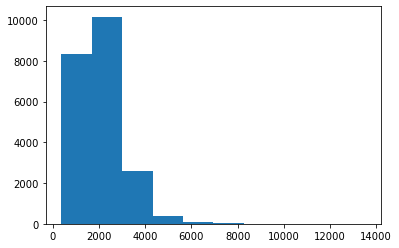

In [102]:
plt.hist(data['sqft_living'])

(array([1.9052e+04, 2.1180e+03, 2.9800e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <BarContainer object of 10 artists>)

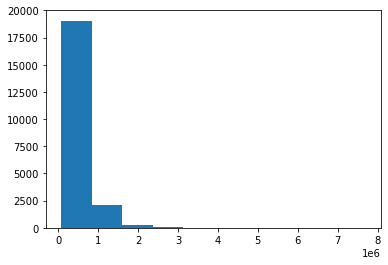

In [103]:
plt.hist(data['price'])

(array([3325., 6408., 5704., 3134., 1614.,  700.,  376.,  191.,   98.,
          46.]),
 array([ 87.58823529, 159.84330065, 232.09836601, 304.35343137,
        376.60849673, 448.86356209, 521.11862745, 593.37369281,
        665.62875817, 737.88382353, 810.13888889]),
 <BarContainer object of 10 artists>)

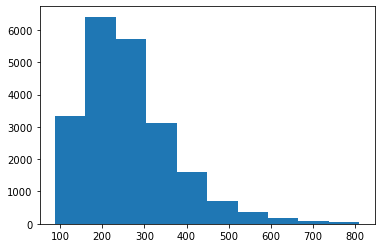

In [104]:
plt.hist(data['price_per_sqft_living'])

Starting with our simple model, we will look at the model utilizing sqft_living as our independent variable based on it having the highest correlation with price.

In [105]:
y = training_data ['price']
X = training_data [['sqft_living']]

lr = sm.OLS(endog=y, exog=sm.add_constant(X))

In [106]:
simple_model_summary = lr.fit().summary()

In [107]:
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.707e+04
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:25:40   Log-Likelihood:            -2.3995e+05
No. Observations:               17276   AIC:                         4.799e+05
Df Residuals:                   17274   BIC:                         4.799e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.513e+04   4893.060     -9.224      0.000   -5.47e+04   -3.55e+04
sqft_living   281.0994      2.151    130.665      0.000     276.883     285.316
==============================================================================
Omnibus:                    12320.858   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539419.118
Skew:                           2.931   Prob(JB):                         0.00
Kurtosis:                      29.739   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For our simple summary, we see an R-squared of .493. Our p-value is <.05, showing that our results are statistically repeatable. 

In [108]:
#Checking for linear relationship

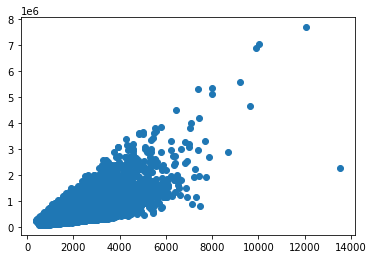

In [109]:
plt.scatter(X,y)

In [110]:
X_train.shape

(17276, 38)

In [111]:
X_test.shape

(4320, 38)

In [112]:
lr = LinearRegression()

lr.fit(X_train, y_train)

train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

In [113]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds

In [114]:
#Checking for normality

In [215]:
train_residuals

,price
17843,-94471.909246
16911,21225.298347
20876,-230125.036402
14355,-101472.917383
15790,-26612.925358
...,...
1160,-129204.173267
21246,27803.735368
1175,87640.585479
2934,-68166.662013


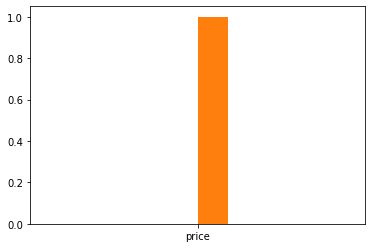

In [214]:
plt.hist(train_residuals, label='Train')
plt.hist(test_residuals, label='Test')

plt.show()

In [116]:
#Checking for heteroskedasticity

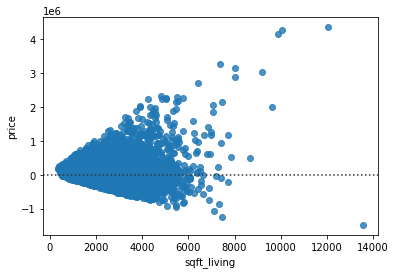

In [117]:
sns.residplot(x=X_train['sqft_living'], y=y_train)
plt.show()        

In [118]:
#Our simple model does not show heteroskedasticity and thus is not a good moodel regarding our assumptions.

In [119]:
#Heteroskadasticity for whole model; not great

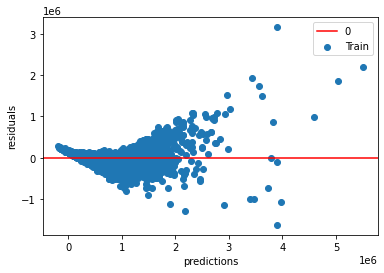

In [120]:
plt.scatter(train_preds, train_residuals, label='Train')

plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

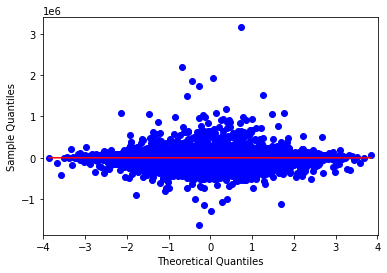

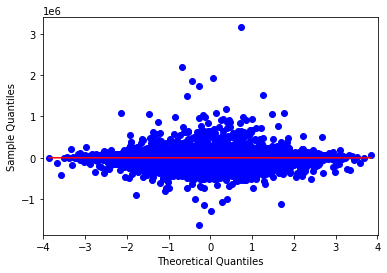

In [121]:
sm.qqplot(train_residuals, line = 'r')

In [122]:
#just take the top correlated features with price
top_features = price_corr.index[1:11]

X1 = X_train[top_features]
y = y_train

model1_corr = sm.OLS(y, sm.add_constant(X1)).fit()
model1_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 1.283e+04
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:25:41   Log-Likelihood:            -2.2747e+05
No. Observations:               17276   AIC:                         4.550e+05
Df Residuals:                   17265   BIC:                         4.551e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.678e+05   6913.268    -82.125      0.000   -5.81e+05   -5.54e+05
sqft_living             267.2240     12.641     21.140      0.000     242.447     292.001
sqft_above               30.1367     12.587      2.394      0.017       5.465      54.809
sqft_living15           -20.6747      2.261     -9.143      0.000     -25.107     -16.242
price_per_sqft_living  2046.3738      9.432    216.968      0.000    2027.887    2064.861
bathrooms              1.015e+04   1947.195      5.211      0.000    6329.969     1.4e+04
view_NONE             -4.024e+04   3575.924    -11.252      0.000   -4.72e+04   -3.32e+04
grade_11 Excellent     1.089e+05   7937.551     13.715      0.000    9.33e+04    1.24e+05
grade_10 Very Good     2.068e+04   4908.399      4.214      0.000    1.11e+04    3.03e+04
sqft_basement            35.9818     12.585      2.859      0.004      11.313      60.651
bedrooms                 -0.9196   1379.455     -0.001      0.999   -2704.791    2702.952
==============================================================================
Omnibus:                    18686.454   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8438399.123
Skew:                           4.844   Prob(JB):                         0.00
Kurtosis:                     110.837   Cond. No.                     3.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
from sklearn.metrics import mean_squared_error

In [124]:
model1 = LinearRegression().fit(X1, y_train)
pred1=model1.predict(X1)
train1_rmse = mean_squared_error(y_train, pred1, squared=False)

X1_test = X_test[X1.columns]
pred1_test = model1.predict(X1_test)
test1_rmse = mean_squared_error(y_test, pred1_test, squared=False)

In [125]:
print('Model 1 - Based On Observations:')
print('  Training Data RMSE: ',train1_rmse)
print('  Test Data RMSE: ',test1_rmse)

Model 1 - Based On Observations:
  Training Data RMSE:  126504.22515719225
  Test Data RMSE:  120352.03635524139


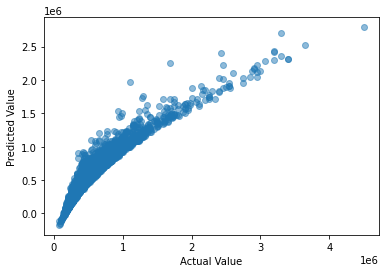

In [126]:
preds = model1.predict(X1_test)
fig, ax = plt.subplots()

ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Value")
ax.set_ylabel("Predicted Value");

In [127]:
#Checking for linearity, relationship seems pretty linear. 

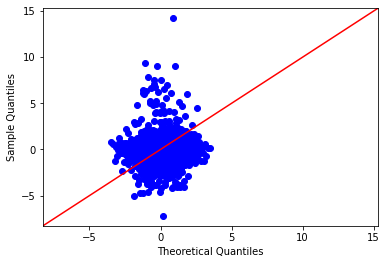

In [128]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [129]:
#Checking for normality, few outliers but not bad.

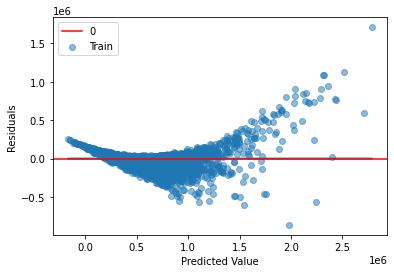

In [130]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5, label='Train')
ax.plot(preds, [0 for i in range(len(X1_test))])
plt.axhline(y=0, color = 'red', label = '0')
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Residuals")
plt.legend()
plt.show();


In [131]:
#Check for homoskedasticity/trend in errors, there does seem to be a pattern in our errors.

Even though I used the top 10 variables, it does not make sense to use some of the grade categorical data and not all of it. Adjusting to include all (except 'grade_7 Average to be used as baseline) of the grade categories. We will not include grade_3 Poor since there are no values in that column. Will also not include view_None since the other view categories were far below on correlations to price.

In [132]:
price_corr

price                    1.000000
sqft_living              0.705037
sqft_above               0.608112
sqft_living15            0.584559
price_per_sqft_living    0.548454
bathrooms                0.529186
view_NONE                0.352862
grade_11 Excellent       0.352644
grade_10 Very Good       0.333804
sqft_basement            0.323081
bedrooms                 0.319467
grade_7 Average          0.310763
grade_12 Luxury          0.306521
lat                      0.302195
view_EXCELLENT           0.294856
distance_from_Seattle    0.280633
floors                   0.256185
waterfront_YES           0.255937
grade_9 Better           0.234584
grade_13 Mansion         0.228527
grade_6 Low Average      0.210839
view_GOOD                0.181244
view_AVERAGE             0.146981
view_FAIR                0.094922
sqft_lot                 0.089471
sqft_lot15               0.086093
grade_5 Fair             0.084315
yr_built                 0.057282
waterfront_NO            0.055360
condition_Fair

In [133]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               17276 non-null  int64  
 1   bathrooms              17276 non-null  float64
 2   sqft_living            17276 non-null  int64  
 3   sqft_lot               17276 non-null  int64  
 4   floors                 17276 non-null  float64
 5   sqft_above             17276 non-null  int64  
 6   sqft_basement          17276 non-null  float64
 7   yr_built               17276 non-null  int64  
 8   lat                    17276 non-null  float64
 9   long                   17276 non-null  float64
 10  sqft_living15          17276 non-null  int64  
 11  sqft_lot15             17276 non-null  int64  
 12  price_per_sqft_living  17276 non-null  float64
 13  distance_from_Seattle  17276 non-null  float64
 14  view_AVERAGE           17276 non-null  uint8  
 15 

In [134]:
X_train['grade_3 Poor'].value_counts()

0    17276
Name: grade_3 Poor, dtype: int64

In [135]:
features2 = X_train[['sqft_living', 'sqft_above', 'sqft_living15', 'price_per_sqft_living', 'bathrooms','grade_13 Mansion', 'grade_12 Luxury', 'grade_11 Excellent', 'grade_10 Very Good', 'grade_9 Better', 'grade_8 Good', 'grade_6 Low Average', 'grade_5 Fair', 'grade_4 Low', 'sqft_basement', 'bedrooms']]

In [136]:
features2

,sqft_living,sqft_above,sqft_living15,price_per_sqft_living,bathrooms,grade_13 Mansion,grade_12 Luxury,grade_11 Excellent,grade_10 Very Good,grade_9 Better,grade_8 Good,grade_6 Low Average,grade_5 Fair,grade_4 Low,sqft_basement,bedrooms
17843,1980,1560,2360,148.989899,2.25,0,0,0,0,1,0,0,0,0,420.0,3
16911,890,890,1270,402.247191,1.00,0,0,0,0,0,0,0,0,0,0.0,3
20876,5370,3500,4443,147.113594,3.00,0,0,0,1,0,0,0,0,0,1870.0,4
14355,1600,1600,2210,300.000000,1.75,0,0,0,0,0,1,0,0,0,0.0,3
15790,2860,1920,2860,416.083916,2.25,0,0,0,1,0,0,0,0,0,940.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,2400,1640,1940,181.250000,3.50,0,0,0,0,0,1,0,0,0,760.0,6
21246,1650,1350,1650,338.787879,3.00,0,0,0,0,0,1,0,0,0,300.0,2
1175,1280,1000,1550,457.031250,1.75,0,0,0,0,0,0,0,0,0,280.0,2
2934,3130,3130,2780,219.019169,2.50,0,0,0,0,1,0,0,0,0,0.0,4


In [137]:
X2 = features2
y = y_train

model2_corr = sm.OLS(y, sm.add_constant(X2)).fit()
model2_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     9170.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:25:42   Log-Likelihood:            -2.2644e+05
No. Observations:               17276   AIC:                         4.529e+05
Df Residuals:                   17259   BIC:                         4.531e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.787e+05   5971.000    -96.916      0.000    -5.9e+05   -5.67e+05
sqft_living             258.9079     11.900     21.758      0.000     235.584     282.232
sqft_above                5.6541     11.865      0.477      0.634     -17.603      28.911
sqft_living15           -12.7286      2.195     -5.799      0.000     -17.031      -8.426
price_per_sqft_living  1996.8583      9.101    219.400      0.000    1979.019    2014.698
bathrooms               1.32e+04   1931.136      6.836      0.000    9415.101     1.7e+04
grade_13 Mansion       1.463e+06   3.96e+04     36.933      0.000    1.39e+06    1.54e+06
grade_12 Luxury        4.831e+05   1.59e+04     30.433      0.000    4.52e+05    5.14e+05
grade_11 Excellent     1.793e+05   8824.070     20.321      0.000    1.62e+05    1.97e+05
grade_10 Very Good     6.451e+04   5760.228     11.199      0.000    5.32e+04    7.58e+04
grade_9 Better         7548.6575   3924.294      1.924      0.054    -143.358    1.52e+04
grade_8 Good          -7599.8553   2497.974     -3.042      0.002   -1.25e+04   -2703.573
grade_6 Low Average    4718.7183   3419.666      1.380      0.168   -1984.174    1.14e+04
grade_5 Fair          -1.266e+04   8693.106     -1.456      0.145   -2.97e+04    4378.576
grade_4 Low           -6.808e+04   2.55e+04     -2.665      0.008   -1.18e+05    -1.8e+04
sqft_basement            24.7760     11.861      2.089      0.037       1.527      48.025
bedrooms               7164.1363   1324.511      5.409      0.000    4567.960    9760.312
==============================================================================
Omnibus:                    13790.991   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3909319.369
Skew:                           2.877   Prob(JB):                         0.00
Kurtosis:                      76.469   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see our R-squared increased to .89, however we have multiple p-values that are not significant, including sqft_above, grade_9 Better, grade_6 Low Average, and grade_5 Fair. Since sqft_above is closely correlated to sqft_living, we will drop sqft_above for the next model. We will drop all variables with a correlatoin of over .70 with sqft_living, including sqft_above, bathrooms, sqft_living15, and sqft_lot. 

In [138]:
model2 = LinearRegression().fit(X2, y_train)
pred2=model2.predict(X2)
train2_rmse = mean_squared_error(y_train, pred2, squared=False)

X2_test = X_test[X2.columns]
pred2_test = model2.predict(X2_test)
test2_rmse = mean_squared_error(y_test, pred2_test, squared=False)

In [139]:
print('Model 2 - Based On Observations:')
print('  Training Data RMSE: ',train2_rmse)
print('  Test Data RMSE: ',test2_rmse)

Model 2 - Based On Observations:
  Training Data RMSE:  119185.98209757115
  Test Data RMSE:  119917.05654278061


Model 2 has a lower RMSE than Model 1, meaning it is a better fit.

In [140]:
features3 = X_train[['sqft_living', 'price_per_sqft_living', 'grade_13 Mansion', 'grade_12 Luxury', 'grade_11 Excellent', 'grade_10 Very Good', 'grade_9 Better', 'grade_8 Good', 'grade_6 Low Average', 'grade_5 Fair', 'grade_4 Low', 'sqft_basement', 'bedrooms']]

In [141]:
X3 = features3
y = y_train

model3_corr = sm.OLS(y, sm.add_constant(X3)).fit()
model3_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.123e+04
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:25:42   Log-Likelihood:            -2.2649e+05
No. Observations:               17276   AIC:                         4.530e+05
Df Residuals:                   17262   BIC:                         4.531e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.793e+05   5377.444   -107.737      0.000    -5.9e+05   -5.69e+05
sqft_living             264.6819      2.142    123.576      0.000     260.484     268.880
price_per_sqft_living  1989.6375      9.083    219.057      0.000    1971.834    2007.441
grade_13 Mansion       1.476e+06   3.97e+04     37.214      0.000     1.4e+06    1.55e+06
grade_12 Luxury        4.827e+05   1.58e+04     30.534      0.000    4.52e+05    5.14e+05
grade_11 Excellent     1.769e+05   8682.970     20.370      0.000     1.6e+05    1.94e+05
grade_10 Very Good     6.189e+04   5602.467     11.046      0.000    5.09e+04    7.29e+04
grade_9 Better         6021.7156   3781.365      1.592      0.111   -1390.144    1.34e+04
grade_8 Good          -6015.9112   2410.140     -2.496      0.013   -1.07e+04   -1291.793
grade_6 Low Average    1994.9281   3364.732      0.593      0.553   -4600.287    8590.143
grade_5 Fair          -1.598e+04   8693.670     -1.838      0.066    -3.3e+04    1059.608
grade_4 Low           -7.274e+04   2.56e+04     -2.842      0.004   -1.23e+05   -2.26e+04
sqft_basement            20.3839      2.427      8.400      0.000      15.627      25.140
bedrooms               8583.5011   1312.938      6.538      0.000    6010.010    1.12e+04
==============================================================================
Omnibus:                    13960.419   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3952970.981
Skew:                           2.941   Prob(JB):                         0.00
Kurtosis:                      76.871   Cond. No.                     1.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our adjusted R-squared decreased by .001. We see the following variables are not significant according to p-value: 'grade_9 Better', 'grade_6 Low Average', 'grade_5 Fair'. We can infer that price is mostly effected by our more extreme grades, such as Low, Very Good, Excellent, Luxury, and Mansion. 

In [142]:
model3 = LinearRegression().fit(X3, y_train)
pred3=model3.predict(X3)
train3_rmse = mean_squared_error(y_train, pred3, squared=False)

X3_test = X_test[X3.columns]
pred3_test = model3.predict(X3_test)
test3_rmse = mean_squared_error(y_test, pred3_test, squared=False)

In [143]:
print('Model 3 - Based On Observations:')
print('  Training Data RMSE: ',train3_rmse)
print('  Test Data RMSE: ',test3_rmse)

Model 3 - Based On Observations:
  Training Data RMSE:  119483.09543088978
  Test Data RMSE:  120620.42446944884


Both our Training and Test RMSE increased from model 2.

Next, we will also drop price_per_sqft_living since we will not have access to the price_per_sqft_living of a new listing (since we have not yet set the price). 

In [144]:
features4 = X_train[['sqft_living', 'grade_13 Mansion', 'grade_12 Luxury', 'grade_11 Excellent', 'grade_10 Very Good', 'grade_9 Better', 'grade_8 Good', 'grade_6 Low Average', 'grade_5 Fair', 'grade_4 Low', 'sqft_basement', 'bedrooms']]

In [145]:
X4 = features4
y = y_train

model4_corr = sm.OLS(y, sm.add_constant(X4)).fit()
model4_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     2160.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:25:42   Log-Likelihood:            -2.3797e+05
No. Observations:               17276   AIC:                         4.760e+05
Df Residuals:                   17263   BIC:                         4.761e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.155e+05   7716.017     27.925      0.000       2e+05    2.31e+05
sqft_living           143.2933      4.022     35.625      0.000     135.409     151.177
grade_13 Mansion     2.661e+06   7.64e+04     34.840      0.000    2.51e+06    2.81e+06
grade_12 Luxury      1.247e+06      3e+04     41.593      0.000    1.19e+06    1.31e+06
grade_11 Excellent   6.895e+05   1.63e+04     42.415      0.000    6.58e+05    7.21e+05
grade_10 Very Good   4.038e+05   1.05e+04     38.597      0.000    3.83e+05    4.24e+05
grade_9 Better       2.111e+05   7122.704     29.632      0.000    1.97e+05    2.25e+05
grade_8 Good         7.025e+04   4636.488     15.151      0.000    6.12e+04    7.93e+04
grade_6 Low Average -3.066e+04   6535.060     -4.692      0.000   -4.35e+04   -1.79e+04
grade_5 Fair        -5.081e+04   1.69e+04     -3.007      0.003   -8.39e+04   -1.77e+04
grade_4 Low         -7.263e+04   4.98e+04     -1.459      0.144    -1.7e+05    2.49e+04
sqft_basement          92.8535      4.674     19.867      0.000      83.692     102.015
bedrooms            -2.457e+04   2535.513     -9.689      0.000   -2.95e+04   -1.96e+04
==============================================================================
Omnibus:                    11245.022   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           455895.329
Skew:                           2.569   Prob(JB):                         0.00
Kurtosis:                      27.636   Cond. No.                     9.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see our R-squared drop significantly from not including price_per_sqft.

In [146]:
model4 = LinearRegression().fit(X4, y_train)
pred4=model4.predict(X4)
train4_rmse = mean_squared_error(y_train, pred4, squared=False)

X4_test = X_test[X4.columns]
pred4_test = model4.predict(X4_test)
test4_rmse = mean_squared_error(y_test, pred4_test, squared=False)

In [147]:
print('Model 4 - Based On Observations:')
print('  Training Data RMSE: ',train4_rmse)
print('  Test Data RMSE: ',test4_rmse)

Model 4 - Based On Observations:
  Training Data RMSE:  232297.7041989456
  Test Data RMSE:  242261.17293067503


We also see a significan increase in our RMSEs.

We will include distance_from_Seattle since this covers multiple variables that were correlated to price, including lat and long and may have some overlap with zipcode.

In [148]:
features5 = X_train[['sqft_living', 'grade_13 Mansion', 'grade_12 Luxury', 'grade_11 Excellent', 'grade_10 Very Good', 'grade_9 Better', 'grade_8 Good', 'grade_6 Low Average', 'grade_5 Fair', 'grade_4 Low', 'sqft_basement', 'bedrooms', 'distance_from_Seattle']]

In [149]:
X5 = features5
y = y_train

model5_corr = sm.OLS(y, sm.add_constant(X5)).fit()
model5_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     2928.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:25:42   Log-Likelihood:            -2.3583e+05
No. Observations:               17276   AIC:                         4.717e+05
Df Residuals:                   17262   BIC:                         4.718e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.475e+05   7074.498     49.119      0.000    3.34e+05    3.61e+05
sqft_living             199.8513      3.645     54.833      0.000     192.707     206.995
grade_13 Mansion       2.355e+06   6.76e+04     34.824      0.000    2.22e+06    2.49e+06
grade_12 Luxury        1.069e+06   2.66e+04     40.193      0.000    1.02e+06    1.12e+06
grade_11 Excellent     5.462e+05   1.45e+04     37.649      0.000    5.18e+05    5.75e+05
grade_10 Very Good     3.083e+05   9341.893     33.003      0.000     2.9e+05    3.27e+05
grade_9 Better          1.55e+05   6343.369     24.431      0.000    1.43e+05    1.67e+05
grade_8 Good            4.69e+04   4109.504     11.413      0.000    3.88e+04     5.5e+04
grade_6 Low Average   -3.497e+04   5773.350     -6.057      0.000   -4.63e+04   -2.37e+04
grade_5 Fair          -3109.7229   1.49e+04     -0.208      0.835   -3.24e+04    2.62e+04
grade_4 Low            1115.2449    4.4e+04      0.025      0.980   -8.51e+04    8.73e+04
sqft_basement             3.1433      4.325      0.727      0.467      -5.334      11.620
bedrooms               -2.54e+04   2239.884    -11.341      0.000   -2.98e+04    -2.1e+04
distance_from_Seattle -1.723e+04    247.175    -69.708      0.000   -1.77e+04   -1.67e+04
==============================================================================
Omnibus:                    12595.113   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           767916.435
Skew:                           2.917   Prob(JB):                         0.00
Kurtosis:                      35.137   Cond. No.                     9.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
model5 = LinearRegression().fit(X5, y_train)
pred5=model5.predict(X5)
train5_rmse = mean_squared_error(y_train, pred5, squared=False)

X5_test = X_test[X5.columns]
pred5_test = model5.predict(X5_test)
test5_rmse = mean_squared_error(y_test, pred5_test, squared=False)

In [151]:
print('Model 5 - Based On Observations:')
print('  Training Data RMSE: ',train5_rmse)
print('  Test Data RMSE: ',test5_rmse)

Model 5 - Based On Observations:
  Training Data RMSE:  205203.97500360967
  Test Data RMSE:  214564.83423101387


We see including distance_from_Seattle increased our adjusted R-squared. It also decreased our RMSEs. Next, we will eliminate variables with insignificant p-values, including grade_5 Fair, grade_4 Low, and sqft_basement.

In [152]:
features6 = X_train[['sqft_living', 'grade_13 Mansion', 'grade_12 Luxury', 'grade_11 Excellent', 'grade_10 Very Good', 'grade_9 Better', 'grade_8 Good', 'grade_6 Low Average', 'bedrooms', 'distance_from_Seattle']]

In [153]:
X6 = features6
y = y_train

model6_corr = sm.OLS(y, sm.add_constant(X6)).fit()
model6_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     3807.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:25:42   Log-Likelihood:            -2.3583e+05
No. Observations:               17276   AIC:                         4.717e+05
Df Residuals:                   17265   BIC:                         4.718e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.468e+05   6930.552     50.034      0.000    3.33e+05     3.6e+05
sqft_living             201.1129      3.228     62.310      0.000     194.786     207.439
grade_13 Mansion       2.351e+06   6.74e+04     34.861      0.000    2.22e+06    2.48e+06
grade_12 Luxury        1.066e+06   2.63e+04     40.559      0.000    1.01e+06    1.12e+06
grade_11 Excellent     5.436e+05   1.41e+04     38.617      0.000    5.16e+05    5.71e+05
grade_10 Very Good     3.064e+05   8979.727     34.123      0.000    2.89e+05    3.24e+05
grade_9 Better         1.537e+05   6080.846     25.271      0.000    1.42e+05    1.66e+05
grade_8 Good           4.646e+04   4045.604     11.483      0.000    3.85e+04    5.44e+04
grade_6 Low Average   -3.482e+04   5739.256     -6.066      0.000   -4.61e+04   -2.36e+04
bedrooms              -2.539e+04   2234.888    -11.361      0.000   -2.98e+04    -2.1e+04
distance_from_Seattle -1.729e+04    235.703    -73.335      0.000   -1.77e+04   -1.68e+04
==============================================================================
Omnibus:                    12592.508   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           766757.728
Skew:                           2.917   Prob(JB):                         0.00
Kurtosis:                      35.112   Cond. No.                     9.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We don't see a difference in our Adj. R Squared.

In [154]:
model6 = LinearRegression().fit(X6, y_train)
pred6=model6.predict(X6)
train6_rmse = mean_squared_error(y_train, pred6, squared=False)

X6_test = X_test[X6.columns]
pred6_test = model6.predict(X6_test)
test6_rmse = mean_squared_error(y_test, pred6_test, squared=False)

In [155]:
print('Model 6 - Based On Observations:')
print('  Training Data RMSE: ',train6_rmse)
print('  Test Data RMSE: ',test6_rmse)

Model 6 - Based On Observations:
  Training Data RMSE:  205207.35104628108
  Test Data RMSE:  214582.86357770488


The difference in our RMSE is also very low.

We will include our views since view_NONE was highly correlated with price. We will leave out view_AVERAGE as our baseline.

In [156]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               17276 non-null  int64  
 1   bathrooms              17276 non-null  float64
 2   sqft_living            17276 non-null  int64  
 3   sqft_lot               17276 non-null  int64  
 4   floors                 17276 non-null  float64
 5   sqft_above             17276 non-null  int64  
 6   sqft_basement          17276 non-null  float64
 7   yr_built               17276 non-null  int64  
 8   lat                    17276 non-null  float64
 9   long                   17276 non-null  float64
 10  sqft_living15          17276 non-null  int64  
 11  sqft_lot15             17276 non-null  int64  
 12  price_per_sqft_living  17276 non-null  float64
 13  distance_from_Seattle  17276 non-null  float64
 14  view_AVERAGE           17276 non-null  uint8  
 15 

In [157]:
features7 = X_train[['sqft_living', 'grade_13 Mansion', 'grade_12 Luxury', 'grade_11 Excellent', 'grade_10 Very Good', 'grade_9 Better', 'grade_8 Good', 'grade_6 Low Average', 'bedrooms', 'distance_from_Seattle', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE']]

In [158]:
X7 = features7
y = y_train

model7_corr = sm.OLS(y, sm.add_constant(X7)).fit()
model7_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     3073.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:25:42   Log-Likelihood:            -2.3509e+05
No. Observations:               17276   AIC:                         4.702e+05
Df Residuals:                   17261   BIC:                         4.703e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.064e+05   9835.455     41.322      0.000    3.87e+05    4.26e+05
sqft_living             182.6798      3.138     58.220      0.000     176.530     188.830
grade_13 Mansion       2.278e+06   6.47e+04     35.226      0.000    2.15e+06     2.4e+06
grade_12 Luxury        9.983e+05   2.53e+04     39.509      0.000    9.49e+05    1.05e+06
grade_11 Excellent     5.313e+05   1.35e+04     39.367      0.000    5.05e+05    5.58e+05
grade_10 Very Good     2.982e+05   8607.151     34.649      0.000    2.81e+05    3.15e+05
grade_9 Better         1.486e+05   5830.358     25.491      0.000    1.37e+05     1.6e+05
grade_8 Good           4.504e+04   3877.962     11.614      0.000    3.74e+04    5.26e+04
grade_6 Low Average   -3.915e+04   5499.635     -7.118      0.000   -4.99e+04   -2.84e+04
bedrooms              -1.781e+04   2150.740     -8.280      0.000    -2.2e+04   -1.36e+04
distance_from_Seattle -1.657e+04    227.280    -72.924      0.000    -1.7e+04   -1.61e+04
view_EXCELLENT         3.981e+05   1.44e+04     27.577      0.000     3.7e+05    4.26e+05
view_FAIR              2.718e+04   1.43e+04      1.902      0.057    -836.648    5.52e+04
view_GOOD               8.45e+04   1.22e+04      6.920      0.000    6.06e+04    1.08e+05
view_NONE             -6.727e+04   7441.802     -9.040      0.000   -8.19e+04   -5.27e+04
==============================================================================
Omnibus:                    12104.865   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           889840.284
Skew:                           2.676   Prob(JB):                         0.00
Kurtosis:                      37.750   Cond. No.                     9.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see our Adj. R-Squared increased to .713. We will remove view_FAIR as it is insignificant according to the p-value.

In [159]:
model7 = LinearRegression().fit(X7, y_train)
pred7=model7.predict(X7)
train7_rmse = mean_squared_error(y_train, pred7, squared=False)

X7_test = X_test[X7.columns]
pred7_test = model7.predict(X7_test)
test7_rmse = mean_squared_error(y_test, pred7_test, squared=False)

In [160]:
print('Model 7 - Based On Observations:')
print('  Training Data RMSE: ',train7_rmse)
print('  Test Data RMSE: ',test7_rmse)

Model 7 - Based On Observations:
  Training Data RMSE:  196576.144194915
  Test Data RMSE:  203441.6528754414


Our RMSE also decreased from Model 6.

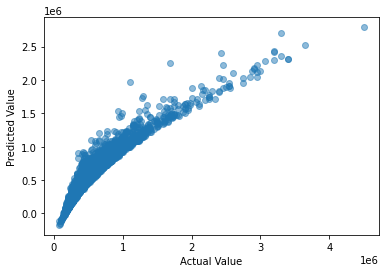

In [161]:
preds7 = model7.predict(X7_test)
fig, ax = plt.subplots()

ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Value")
ax.set_ylabel("Predicted Value");

In [162]:
train_residuals = y_train - pred7
test_residuals = y_test - pred7_test

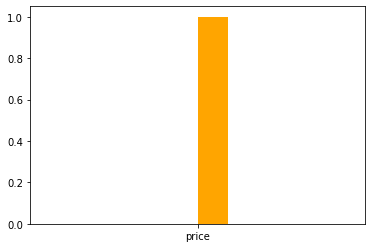

In [163]:
plt.hist(train_residuals, label='Train', color='g')
plt.hist(test_residuals, label='Test', color='orange')

plt.show()

In [164]:
features8 = X_train[['sqft_living', 'grade_13 Mansion', 'grade_12 Luxury', 'grade_11 Excellent', 'grade_10 Very Good', 'grade_9 Better', 'grade_8 Good', 'grade_6 Low Average', 'bedrooms', 'distance_from_Seattle', 'view_EXCELLENT', 'view_GOOD', 'view_NONE']]

In [165]:
X8 = features8
y = y_train

model8_corr = sm.OLS(y, sm.add_constant(X8)).fit()
model8_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     3309.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:25:42   Log-Likelihood:            -2.3509e+05
No. Observations:               17276   AIC:                         4.702e+05
Df Residuals:                   17262   BIC:                         4.703e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.133e+05   9146.481     45.186      0.000    3.95e+05    4.31e+05
sqft_living             182.7404      3.138     58.238      0.000     176.590     188.891
grade_13 Mansion       2.276e+06   6.47e+04     35.199      0.000    2.15e+06     2.4e+06
grade_12 Luxury        9.974e+05   2.53e+04     39.477      0.000    9.48e+05    1.05e+06
grade_11 Excellent      5.31e+05   1.35e+04     39.348      0.000    5.05e+05    5.57e+05
grade_10 Very Good      2.98e+05   8607.155     34.625      0.000    2.81e+05    3.15e+05
grade_9 Better         1.485e+05   5830.556     25.472      0.000    1.37e+05     1.6e+05
grade_8 Good           4.496e+04   3878.020     11.593      0.000    3.74e+04    5.26e+04
grade_6 Low Average   -3.914e+04   5500.050     -7.116      0.000   -4.99e+04   -2.84e+04
bedrooms               -1.78e+04   2150.902     -8.277      0.000    -2.2e+04   -1.36e+04
distance_from_Seattle -1.659e+04    227.166    -73.026      0.000    -1.7e+04   -1.61e+04
view_EXCELLENT         3.913e+05    1.4e+04     27.968      0.000    3.64e+05    4.19e+05
view_GOOD               7.77e+04   1.17e+04      6.655      0.000    5.48e+04    1.01e+05
view_NONE             -7.407e+04   6528.343    -11.346      0.000   -8.69e+04   -6.13e+04
==============================================================================
Omnibus:                    12099.484   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           886057.369
Skew:                           2.675   Prob(JB):                         0.00
Kurtosis:                      37.674   Cond. No.                     9.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No changes.

In [166]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               17276 non-null  int64  
 1   bathrooms              17276 non-null  float64
 2   sqft_living            17276 non-null  int64  
 3   sqft_lot               17276 non-null  int64  
 4   floors                 17276 non-null  float64
 5   sqft_above             17276 non-null  int64  
 6   sqft_basement          17276 non-null  float64
 7   yr_built               17276 non-null  int64  
 8   lat                    17276 non-null  float64
 9   long                   17276 non-null  float64
 10  sqft_living15          17276 non-null  int64  
 11  sqft_lot15             17276 non-null  int64  
 12  price_per_sqft_living  17276 non-null  float64
 13  distance_from_Seattle  17276 non-null  float64
 14  view_AVERAGE           17276 non-null  uint8  
 15 

In [208]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
17843,3,2.25,1980,8000,1.0,1560,420.0,1974,47.3149,-122.378,...,0,0,0,0,0,1,0,0,0,0
16911,3,1.00,890,9870,1.0,890,0.0,1960,47.5398,-122.178,...,0,0,0,1,0,0,0,0,0,0
20876,4,3.00,5370,69848,2.0,3500,1870.0,2005,47.3166,-122.046,...,0,0,0,0,0,0,1,0,0,0
14355,3,1.75,1600,8400,1.0,1600,0.0,1963,47.5479,-122.179,...,0,0,0,0,1,0,0,0,0,0
15790,3,2.25,2860,10625,1.0,1920,940.0,1976,47.6915,-122.273,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,6,3.50,2400,8620,2.0,1640,760.0,1987,47.7152,-122.162,...,0,0,0,0,1,0,0,0,0,0
21246,2,3.00,1650,960,3.0,1350,300.0,2015,47.6611,-122.346,...,0,0,0,0,1,0,0,0,0,0
1175,2,1.75,1280,7110,1.0,1000,280.0,1955,47.5569,-122.273,...,0,0,0,1,0,0,0,0,0,0
2934,4,2.50,3130,60467,2.0,3130,0.0,1996,47.6618,-121.962,...,0,0,0,0,0,1,0,0,0,0


In [210]:
X_train_scaled=pd.DataFrame(X_train_scaled)

In [212]:
Xall = X_train.drop(['price_per_sqft_living', 'view_AVERAGE', 'waterfront_NO', 'condition_Average', 'grade_7 Average'], axis=1)
y = y_train

modelall_corr = sm.OLS(y, sm.add_constant(Xall)).fit()
modelall_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     1635.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:40:16   Log-Likelihood:            -2.3384e+05
No. Observations:               17276   AIC:                         4.678e+05
Df Residuals:                   17243   BIC:                         4.680e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.654e+07   2.32e+06     15.730      0.000     3.2e+07    4.11e+07
bedrooms              -1.974e+04   2057.091     -9.595      0.000   -2.38e+04   -1.57e+04
bathrooms              3.879e+04   3343.272     11.604      0.000    3.22e+04    4.53e+04
sqft_living             104.4653     18.421      5.671      0.000      68.358     140.573
sqft_lot                  0.2013      0.047      4.303      0.000       0.110       0.293
floors                -4020.4768   3743.343     -1.074      0.283   -1.14e+04    3316.855
sqft_above               47.1454     18.429      2.558      0.011      11.023      83.268
sqft_basement            16.2715     18.229      0.893      0.372     -19.460      52.003
yr_built              -1422.0292     73.217    -19.422      0.000   -1565.543   -1278.516
lat                    1.712e+05   1.42e+04     12.078      0.000    1.43e+05    1.99e+05
long                   3.399e+05   1.59e+04     21.368      0.000    3.09e+05    3.71e+05
sqft_living15            27.6796      3.526      7.851      0.000      20.769      34.590
sqft_lot15               -0.1543      0.075     -2.049      0.040      -0.302      -0.007
distance_from_Seattle -1.767e+04    416.617    -42.408      0.000   -1.85e+04   -1.69e+04
view_EXCELLENT         1.912e+05   1.59e+04     12.043      0.000     1.6e+05    2.22e+05
view_FAIR              4.184e+04   1.33e+04      3.140      0.002    1.57e+04     6.8e+04
view_GOOD              7.944e+04   1.14e+04      6.962      0.000    5.71e+04    1.02e+05
view_NONE              -6.04e+04   7048.611     -8.569      0.000   -7.42e+04   -4.66e+04
waterfront_UNKNOWN    -2034.9770   4460.188     -0.456      0.648   -1.08e+04    6707.444
waterfront_YES         5.331e+05   2.05e+04     26.018      0.000    4.93e+05    5.73e+05
condition_Poor        -8.901e+04   3.77e+04     -2.363      0.018   -1.63e+05   -1.52e+04
condition_Fair         -1.39e+04   1.56e+04     -0.891      0.373   -4.45e+04    1.67e+04
condition_Good         3.777e+04   3482.562     10.845      0.000    3.09e+04    4.46e+04
condition_Very Good    6.522e+04   5620.740     11.604      0.000    5.42e+04    7.62e+04
grade_3 Poor           9.469e-08   2.65e-09     35.692      0.000    8.95e-08    9.99e-08
grade_4 Low           -3.647e+04   3.94e+04     -0.926      0.354   -1.14e+05    4.07e+04
grade_5 Fair          -6.288e+04   1.36e+04     -4.636      0.000   -8.95e+04   -3.63e+04
grade_6 Low Average   -5.126e+04   5370.893     -9.543      0.000   -6.18e+04   -4.07e+04
grade_8 Good           4.997e+04   3949.573     12.652      0.000    4.22e+04    5.77e+04
grade_9 Better         1.499e+05   6128.854     24.455      0.000    1.38e+05    1.62e+05
grade_10 Very Good     2.903e+05   8816.032     32.923      0.000    2.73e+05    3.08e+05
grade_11 Excellent     

In [168]:
modelall = LinearRegression().fit(Xall, y_train)
predall=modelall.predict(Xall)
trainall_rmse = mean_squared_error(y_train, predall, squared=False)

Xall_test = X_test[Xall.columns]
predall_test = modelall.predict(Xall_test)
testall_rmse = mean_squared_error(y_test, predall_test, squared=False)

In [169]:
print('Model All - Based On Observations:')
print('  Training Data RMSE: ',trainall_rmse)
print('  Test Data RMSE: ',testall_rmse)

Model All - Based On Observations:
  Training Data RMSE:  182908.75863435055
  Test Data RMSE:  186018.40735886016


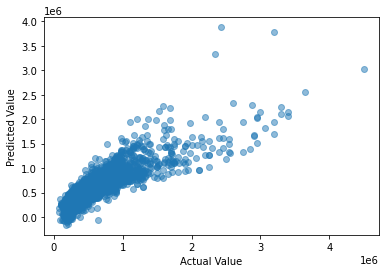

In [170]:
preds = modelall.predict(Xall_test)
fig, ax = plt.subplots()

ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Value")
ax.set_ylabel("Predicted Value");

In [171]:
#Checking for linearity. Data looks pretty linear. 

In [195]:
lr = LinearRegression()

lr.fit(Xall, y_train)

train_preds = lr.predict(Xall)
test_preds = lr.predict(X_test[Xall.columns])

In [196]:
from sklearn.metrics import r2_score

print(f"Train R2: {r2_score(y_train, train_preds):.4f}")
print(f"Test R2: {r2_score(y_test, test_preds):.4f}")

Train R2: 0.7521
Test R2: 0.7435


In [197]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds

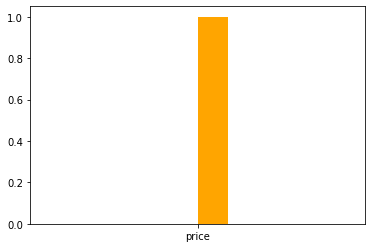

In [198]:
# Histogram of residuals
plt.hist(train_residuals, label='Train', color='g')
plt.hist(test_residuals, label='Test', color='orange')

plt.show()

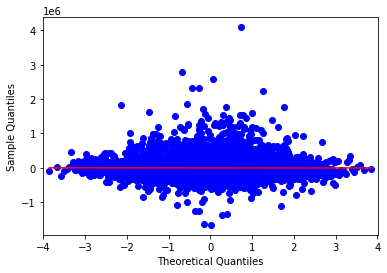

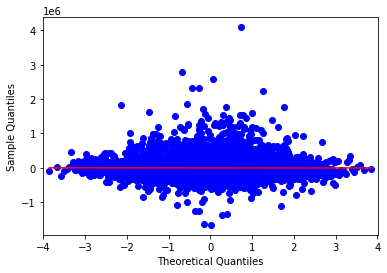

In [199]:
import statsmodels.api as sm

sm.qqplot(train_residuals, line = 'r')


In [200]:
#Checking for normality--serious normality issues

In [205]:
train_residuals

,price
17843,-94471.909246
16911,21225.298347
20876,-230125.036402
14355,-101472.917383
15790,-26612.925358
...,...
1160,-129204.173267
21246,27803.735368
1175,87640.585479
2934,-68166.662013


In [203]:
test_residuals

,price
3991,158287.267960
16939,-102216.928405
9467,-121468.909655
20168,170407.631319
10554,-127528.059768
...,...
7369,-91149.355796
5671,217684.344614
10944,-18503.259265
18174,269483.899989


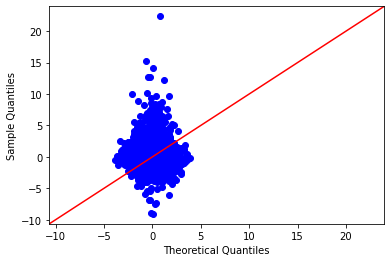

In [201]:
sm.graphics.qqplot(train_residuals, dist=stats.norm, line='45', fit=True);

In [177]:
#With residuals, we don't want to see pattern. There is no overall pattern to the residuals.